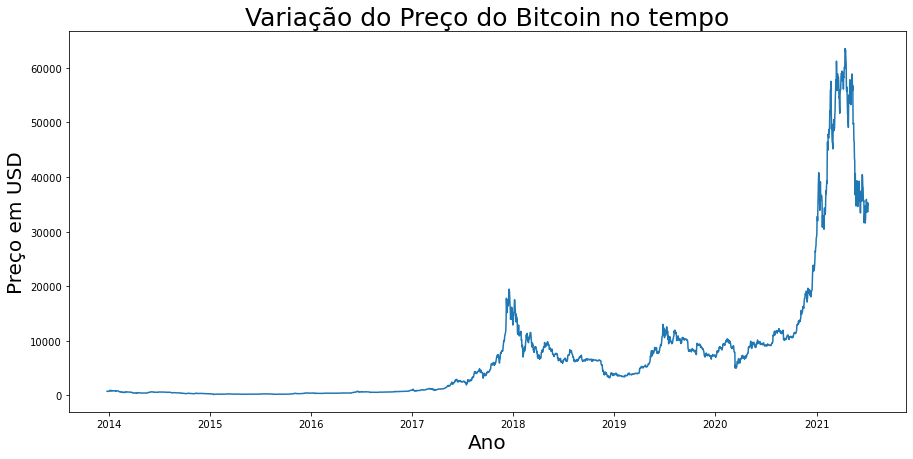

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# dataframe
dataframe = pd.read_csv('df_unificado.csv')
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe['Price_USD'] = pd.to_numeric(dataframe['Price_USD'])

# plot
plt.figure(figsize = (15, 7))
plt.plot(dataframe['Date'], dataframe['Price_USD'])

plt.title('Variação do Preço do Bitcoin no tempo', size=25)
plt.xlabel('Ano', size=20)
plt.ylabel('Preço em USD', size=20)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

In [2]:
# filtrar as datas da janela
filtro = (dataframe['Date']>'2016-07-01') & (dataframe['Date']<='2020-12-01')
dataframe = dataframe.loc[filtro]

print(dataframe)

           Date     Price_USD        Volume     Marketcap  Unique_Addresses  \
918  2016-07-02    676.734009  1.123540e+08  1.106617e+10          348963.0   
919  2016-07-03    704.968018  1.295120e+08  1.036046e+10          352911.0   
920  2016-07-04    658.804016  9.200840e+07  1.075623e+10          403350.0   
921  2016-07-05    683.208984  1.304760e+08  1.055359e+10          384212.0   
922  2016-07-06    670.418030  1.349610e+08  1.066146e+10          373956.0   
...         ...           ...           ...           ...               ...   
2527 2020-11-27  17153.913125  3.888649e+10  3.174645e+11          719237.0   
2528 2020-11-28  17112.934238  3.260104e+10  3.287828e+11          644206.0   
2529 2020-11-29  17719.634614  3.113396e+10  3.373366e+11          589008.0   
2530 2020-11-30  18178.322118  4.772848e+10  3.642297e+11          623554.0   
2531 2020-12-01  19633.770447  4.963366e+10  3.489766e+11          841581.0   

      Transactions    Difficulty  Total_Bitcoins  


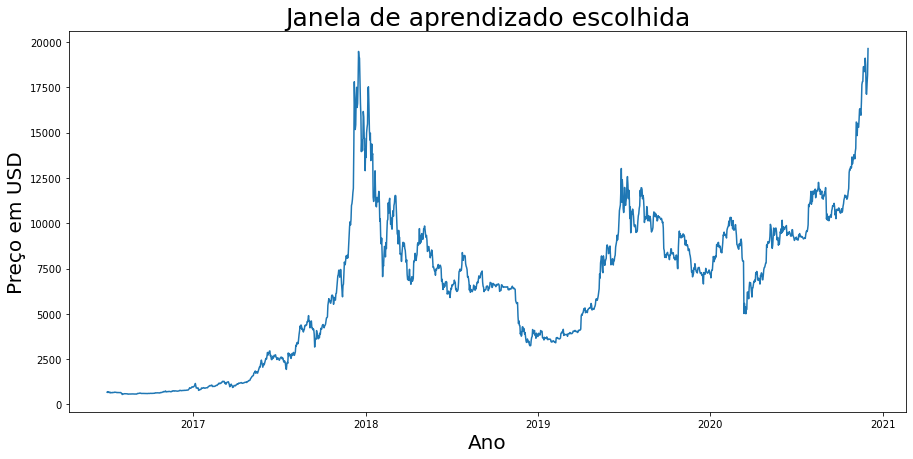

In [3]:
# plot da janela
plt.figure(figsize = (15, 7))
plt.plot(dataframe['Date'], dataframe['Price_USD'])

plt.title('Janela de aprendizado escolhida', size=25)
plt.xlabel('Ano', size=20)
plt.ylabel('Preço em USD', size=20)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

In [4]:
# formatação das colunas
dataframe['Volume'] = pd.to_numeric(dataframe['Volume'])
dataframe['Marketcap'] = pd.to_numeric(dataframe['Marketcap'])
dataframe['Unique_Addresses'] = pd.to_numeric(dataframe['Unique_Addresses'])
dataframe['Transactions'] = pd.to_numeric(dataframe['Transactions'])
dataframe['Difficulty'] = pd.to_numeric(dataframe['Difficulty'])
dataframe['Total_Bitcoins'] = pd.to_numeric(dataframe['Total_Bitcoins'])

# análise de correlação
volume = dataframe['Price_USD'].corr(dataframe['Volume'])
marketcap = dataframe['Price_USD'].corr(dataframe['Marketcap'])
addresses = dataframe['Price_USD'].corr(dataframe['Unique_Addresses'])
transactions = dataframe['Price_USD'].corr(dataframe['Transactions'])
difficulty = dataframe['Price_USD'].corr(dataframe['Difficulty'])
total_Bitcoins = dataframe['Price_USD'].corr(dataframe['Total_Bitcoins'])

print('Correlações com Preço')
print('---------------------')
print('Volume: '+str(volume))
print('Marketcap: '+str(marketcap))
print('Addresses: '+str(addresses))
print('Transactions: '+str(transactions))
print('Difficulty: '+str(difficulty))
print('Total_Bitcoins: '+str(total_Bitcoins))

Correlações com Preço
---------------------
Volume: 0.6472372945397292
Marketcap: 0.9939399972346777
Addresses: 0.5535501918764012
Transactions: 0.2872156957788087
Difficulty: 0.6495306717552864
Total_Bitcoins: 0.7111862865086871


<AxesSubplot:>

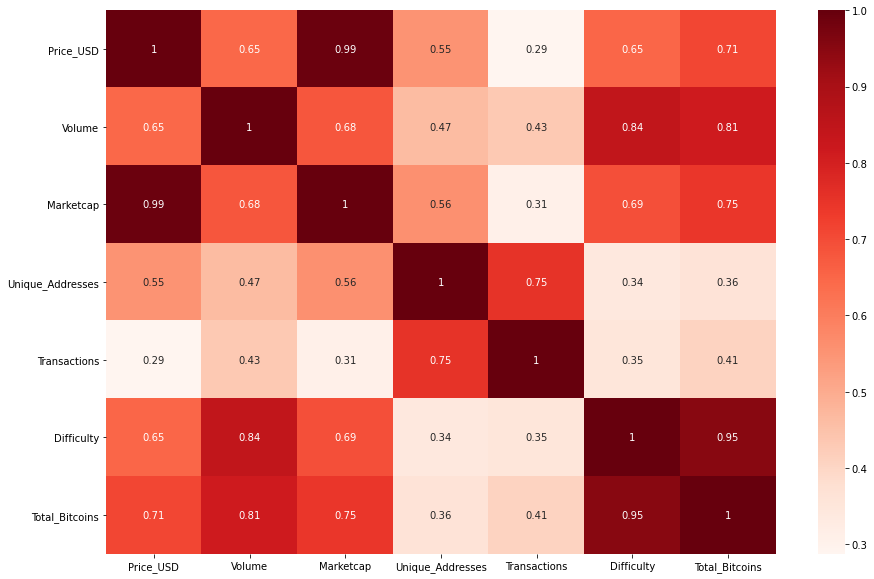

In [10]:
import seaborn as sns

plt.figure(figsize=(15, 10))
#sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(dataframe.corr(), annot=True, cmap="Reds")